In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook
sns.set()

In [2]:
import fitsio
from meds import MEDS

In [3]:
m = MEDS('outputs/y3v02/DES2122+0001/DES2122+0001_r_meds-y3v02.fits.fz')

In [4]:
cat = m.get_cat()

In [5]:
ind = 5
imind = 3

In [6]:
cat['orig_col'][ind, imind]

701.0464466574938

In [7]:
imdata = m.get_image_info()

In [8]:
cat['file_id'][ind, imind]

57

In [9]:
imdata['image_path'][cat['file_id'][ind, imind]]

'outputs/y3v02/DES2122+0001/sources-r/OPS/finalcut/Y2A1/Y2-2175/20141013/D00367450/p01/red/immask/D00367450_r_c32_r2175p01_immasked.fits.fz'

In [10]:
import esutil

In [11]:
hd = fitsio.read_header(
    imdata['image_path'][cat['file_id'][ind, imind]].strip(), ext=1)
wcs = esutil.wcsutil.WCS({k.lower(): hd[k] for k in hd if k is not None})

In [12]:
wcs.image2sky(cat['orig_col'][ind, imind]+1, cat['orig_row'][ind, imind]+1)

(320.44537387650917, 0.016713394256312842)

In [13]:
cat['ra'][ind], cat['dec'][ind]

(320.44537387650917, 0.016713394256311985)

In [14]:
wcs.get_jacobian(cat['orig_col'][ind, imind]+1, cat['orig_row'][ind, imind]+1)

(0.0005723445026215939,
 -0.2621341820600186,
 -0.2630635338244508,
 -0.0007158919734517877)

In [15]:
(cat['dudcol'][ind, imind],
 cat['dudrow'][ind, imind],
 cat['dvdcol'][ind, imind],
 cat['dvdrow'][ind, imind]) 

(0.0005723445026215939,
 -0.2621341820600186,
 -0.2630635338244508,
 -0.0007158919734517877)

In [16]:
im = fitsio.read(imdata['image_path'][cat['file_id'][ind, imind]].strip())

im = im[
    cat['orig_start_row'][ind, imind]:cat['orig_start_row'][ind, imind]+cat['box_size'][ind],
    cat['orig_start_col'][ind, imind]:cat['orig_start_col'][ind, imind]+cat['box_size'][ind]]

im /= im.sum()

In [17]:
mim = m.get_cutout(ind, imind)
mim /= mim.sum()

In [18]:
mim.sum()

1.0

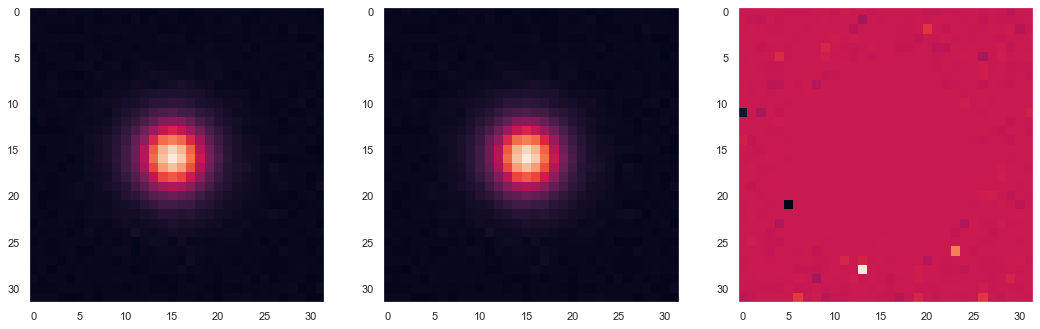

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axs[0].imshow(np.arcsinh(im))
axs[0].grid(False)
axs[1].imshow(np.arcsinh(mim))
axs[1].grid(False)
axs[2].imshow((mim - im)/im)
axs[2].grid(False)

In [20]:
np.allclose(mim, im)

False

In [21]:
np.max(np.abs(mim - im))

0.00038528442

In [22]:
import galsim
from matts_misc.simple_des_y3_sims.psf_wrapper import PSFWrapper
from matts_misc.simple_des_y3_sims.des_piff import DES_Piff

In [23]:
wcs = galsim.FitsWCS(imdata['image_path'][cat['file_id'][ind, imind]].strip(), hdu=1)

In [24]:
import os

psf_path = os.path.join(
    '/Users/Matt/DESDATA/y3_piff/y3a1-v29',
    os.path.basename(imdata['image_path'][cat['file_id'][ind, imind]].strip()).split('_')[0][3:],
    os.path.basename(imdata['image_path'][cat['file_id'][ind, imind]].strip()).replace('_immasked.fits.fz', '_piff.fits'))

In [25]:
import piff

In [26]:
psf = DES_Piff(psf_path)

In [27]:
mpsf = PSFWrapper(psf, wcs)

In [28]:
psf_im = mpsf.get_rec(cat['orig_row'][ind, imind], cat['orig_col'][ind, imind])

In [29]:
mpsf_im = m.get_cutout(ind, imind, type='psf')

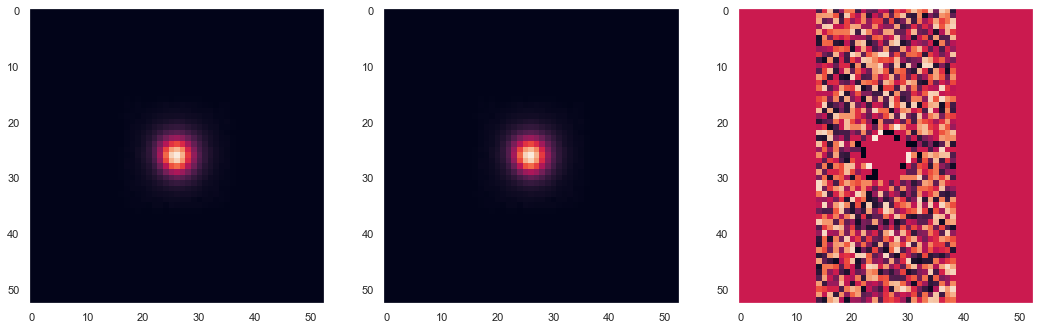

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axs[0].imshow(np.arcsinh(psf_im))
axs[0].grid(False)
axs[1].imshow(np.arcsinh(mpsf_im))
axs[1].grid(False)
axs[2].imshow(np.arcsinh(mpsf_im - psf_im))
axs[2].grid(False)

In [31]:
np.allclose(mpsf_im, psf_im)

True

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))

for ind, ax in zip(range(9), axs.ravel()):
    sns.heatmap(m.get_cutout(ind, 1, type='psf'), square=True, ax=ax)